# Predicting a Winner with Confidence
Do you have two players and want to know if one player is better than the other? You could play them against each other in a competition of $N$ games and see if one player wins significantly more games than the other - but how many games is _significantly more_? How can you be confident that one player is better than the other and that it was not just luck? The answer is **[Hypothesis testing](https://www.investopedia.com/terms/h/hypothesistesting.asp)**. 

In this notebook I'll show you how to apply hypothesis testing to a competition of $N$ games to compare two computer game players. Depending on the outcome of the trial, you will be able to claim a level of confidence in your prediction that one player is better than the other.  

I have included references at the end which might help you out if you need a deeper dive on this topic, otherwise the method is straight forward and easy to utilise if you follow each step.  

## Introduction
Hypothesis testing is used to rule out pure chance being the cause of an effect. For instance if a new drug is being tested on a number of patients and they show a level of improvement, hypothesis testing provides a mechanism to scientifically determine whether the drug caused the improvement or not. There are many forms of hypothesis testing, however we concern ourselves only with [hypothesis testing for a proportion](https://stattrek.com/hypothesis-test/proportion.aspx). 

## Defining the Problem
In our competition between a player and the opponent we can measure how many wins $w$ each player has had, and we know how many games they have played $n$. From this we can obtain an estimate of the players probability of winning $\hat{p}=\frac{w}{n}$ against their opponent. Note that $\hat{p}=1-\hat{q}$ i.e. the sum of both player's probabilities of winning equals 1 because when one of the players wins a game, the other player loses that game. We exclude draws from our competition, since they provide no insight into whether one player is better or not. If a game is drawn, then it is struck from the record as if it never existed. Because $p=1-q$ we only need to perform calculations on one of the players, and can trivially infer the outcome for the other player. For this reason I generally only refer to one of the players. 

Hidden from us each player has a true probability of winning $p$, and what we hope to achieve is that by conducting the competition for $N$ games our estimate of $\hat{p}$ is sufficiently accurate that we can declare one player is better than the other - if that is actually the case. 



### Setting up our Hypothesis
Lets assume that we know the true probability of the two players and they are of equal strength, $p=q=0.5$, then after playing a large number of games $n$ we would expect the number of wins for the player to be $w \approx 0.5 n$ - lets call this our hypothesis. If our hypothesis doesn't hold and the number of wins was significantly different from $0.5 n$ then we could dismiss the idea that both players were equal and declare that one player was better than the other. This is essential the underlying mechanics of hypothesis testing. Importantly, if after $n$ games we observed $w \approx 0.5 n$ as predicted by our hypothesis, we cannot declare that the players are equal, only that the players are not significantly different after $n$ games. To highlight why we can never prove our hypothesis, imagine if the true probability was $p=0.499999$, this would mean that one player was actually slightly better than the player. After a large number of games we might observe $w \approx 0.5 n$, but we have no way of knowing whether or not we have conducted enough games to differentiate such a small difference.    

To formally define our Hypothesis test we call the hypothesis which we are trying to disprove the _null hypothesis_ $H_0$ and the _alternate hypothesis_ is $H_a$. In our case;

$H_0:p=0.5$ and 
$H_a:p\neq 0.5$

We also have; 

$\hat{p}=\frac{w}{n}$ where $\hat{p}$ is the predicted probability of winning a game for a player, $w$ is the number of wins and $n$ is the number of games played.  

After $n$ games, if $\hat{p}$ is significantly different from $0.5$ we will reject $H_0$ and accept $H_a:p\neq 0.5$.


## How do we determine significance?
Now that we have formally defined our hypothesis how do we determine if a difference is significant?

A [_Bernoulli trial_](https://en.wikipedia.org/wiki/Bernoulli_trial) is an experiment with two outcomes, in our case a _win_ and _loss_. Winning and losing are mutually exclusive which requires that $p=1-q$ and if we define a win as $1$ and loss as $0$ for $n$ games then we can represent the Bernoulli trial as a binomial distribution $B(n,p)$ and doing so allows us to visualise the trial. For this example let compare how the distribution changes if the probability is the same, but the number of samples varies.  We'll plot $n=50$ and $n=1000$ with $p=0.65$ giving $B(50,0.65)$ and $B(1000,0.65)$, we can plot the probability mass function (PMF) in python relatively easily using scipy.stats. The [PMF](https://www.probabilitycourse.com/chapter3/3_1_3_pmf.php) gives the probabilities of possible values for a discrete random variable, the total mass of probabilities in a PMF sum to 1.  



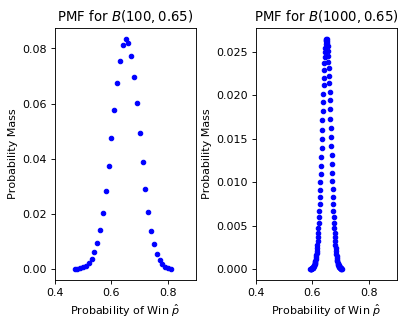

In [20]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure(figsize=(5, 4), dpi= 80, facecolor='w', edgecolor='k')

#############First plot with n=100 p=0.65
n1, p1 = 100, 0.65
plt.subplot(1,2, 1)
mean, var, skew, kurt = binom.stats(n1, p1, moments='mvsk')
x1 = np.arange(binom.ppf(0.0001, n1, p1),
              binom.ppf(0.9999, n1, p1))
y1=binom.pmf(x1, n1, p1)


plt.plot(x1/n1, y1, 'b.', ms=8)
x1_ax,x2_ax,y1_ax,y2_ax = plt.axis()
plt.axis((.4,.9,y1_ax,y2_ax))
plt.xlabel(r"Probability of Win $\hat{p}$")
plt.ylabel("Probability Mass")
plt.title(r"PMF for $B(100,0.65)$")

#############Second plot with n=10000 p=0.65
n2, p2 = 1000, 0.65
plt.subplot(1,2, 2)
mean, var, skew, kurt = binom.stats(n2, p2, moments='mvsk')
x2 = np.arange(binom.ppf(0.0001, n2, p2),
              binom.ppf(0.9999, n2, p2))
y2=binom.pmf(x2, n2, p2)

plt.plot(x2/n2, y2, 'b.', ms=8)
x1_ax,x2_ax,y1_ax,y2_ax = plt.axis()
plt.axis((.4,.9,y1_ax,y2_ax))
plt.xlabel(r"Probability of Win $\hat{p}$")
plt.ylabel("Probability Mass")
#plt.title('Probability Mass Function')
plt.title(r"PMF for $B(1000,0.65)$")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

We can see from these two plots that the higher value of $n$ the narrower the distribution and both plots peak at $\hat{p}=0.65$.

Since the PMF plots indicate the probabilities of possible values of $\hat{p}$ we can accumulate the probabilities of various $\hat{p}$ to sum to any desired probability, say for example having $5\%$ of the probability mass residing to the left of some $\hat{p}$ value and $95\%$ residing on the other. The [scipy.binom.ppf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html) function allows us to achieve this.  


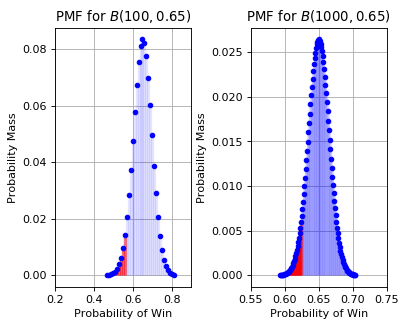

The Lower Confidence Boundary for B(100,0.65):0.57 and B(1000,0.65): 0.625


In [22]:
n1, p1 = 100, 0.65
n2, p2 = 1000, 0.65
alpha=0.05

lc1 = binom.ppf(alpha, n1, p1)/n1 

#uc = binom.ppf(0.95, n, p)/n
#print(f"{lc}-{uc}")

lcbx1 = np.arange(binom.ppf(0.001, n1, p1),binom.ppf(alpha, n1, p1))#this is to plot the colours nicely
lcby1=binom.pmf(lcbx1, n1, p1)

###for UCB
#uc1 = binom.ppf(0.95, n2, p2)/n2
#ucbx1 = np.arange(binom.ppf(0.95, n1, p1),binom.ppf(0.999, n1, p1)) #if you want to find the UCB you get 95%
#ucby1=binom.pmf(ucbx1, n1,2 p1)
fig=plt.figure(figsize=(5, 4), dpi= 80, facecolor='w', edgecolor='k')

lw=3
plt.subplot(1,2, 1)

plt.plot(x1/n1, y1, 'b.', ms=8)
x1_ax,x2_ax,y1_ax,y2_ax = plt.axis()
plt.axis((.2,.9,y1_ax,y2_ax))
plt.vlines(x1/n1, 0, y1, colors='b', lw=lw, alpha=0.1) #NB This alpha is transparancy not sensitivity
plt.vlines(lcbx1/n1, 0, lcby1, colors='r', lw=lw, alpha=0.5)
plt.xlabel("Probability of Win")
plt.ylabel("Probability Mass")
plt.title(r"PMF for $B(100,0.65)$")

plt.grid(True)
################Now for plot 2

plt.subplot(1,2, 2)
alpha2=0.05
lc2 = binom.ppf(alpha2, n2, p2)/n2
lcbx2 = np.arange(binom.ppf(0.001, n2, p2),binom.ppf(alpha2, n2, p2)) #this give us the values to plot
lcby2=binom.pmf(lcbx2, n2, p2)
###for UCB
#uc2 = binom.ppf(0.95, n2, p2)/n2
#ucbx2 = np.arange(binom.ppf(0.95, n2, p2),binom.ppf(0.999, n2, p2)) #if you want to find the UCB you get 95%
#ucby2=binom.pmf(ucbx2, n,2 p2)

lw=3

plt.plot(x2/n2, y2, 'b.', ms=8)
x1_ax,x2_ax,y1_ax,y2_ax = plt.axis()
plt.axis((.55,.75,y1_ax,y2_ax))
plt.vlines(x2/n2, 0, y2, colors='b', lw=lw, alpha=0.1)
plt.vlines(lcbx2/n2, 0, lcby2, colors='r', lw=lw, alpha=0.5)
plt.xlabel("Probability of Win")
plt.ylabel("Probability Mass")
plt.title(r"PMF for $B(1000,0.65)$")

rv = binom(n2, p2)
#ax.vlines(x/n, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
#        label='frozen pmf')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.grid(True)

plt.show()

print(f"The Lower Confidence Boundary for B({n1},{p1}):{lc1} and B({n2},{p2}): {lc2}")


What we have achieved with this code is identified the value of $\hat{p}=0.57$ for $B(50,0.65)$ which is $\hat{p}$ where $5\%$ of the probability mass is below this value, i.e. the red shaded areas total 0.05. In other words there is a $95\%$ probability that the true value of $\hat{p}$ is greater than $0.57$. $\hat{p}=0.57$ is the $95\%$ lower confidence bound (LCB) for $\hat{p}$. The smaller portion we call the significance level and is denoted $\alpha=0.05$ while $1-\alpha=0.95$ is the confidence level. We can see that the if we do more samples as shown in $B(1000,0.65)$ the LCB is closer to the true value of $0.65$ giving us more confidence in what the true value might be. 

The same procedure can be done to determine the upper confidence bound (UCB), except we would then accumulate $95\%$ to the left to the the UCB so we can say that $95\%$ of the probability mass is less than the UCB. If you are using the LCB and UCB together then you need to account for the mass that is between the two values, i.e. if you have $5\%$ of the mass that is less than the LCB and $5\%$ of the mass greater than the UCB then you have $90\%$ of the mass between the two. This is called a _two-sided test_. If you wanted $95\%$ of the probability mass between the LCB and UCB you would need to use $\frac{\alpha}{2}$ for your significance. 



## Confidence Bounds
The higher the confidence you require the less the confidence bounds move with each game played. Imagine for example if we wanted a range which we were $100\%$ confident that covered $p$ - the solution to this is the range $[0,1]$ and regardless of games played we would never change the bounds since we want $100\%$ confidence. To achieve a high level of confidence the upper and lower bound estimates need to be conservative, so that means that they change less when we are demanding a high confidence. If on the other hand low confidence levels are acceptable then the bounds can move more freely. You can see this with the code below. Noting at the lower confidence bound starts at $L=0$ given the same number of games and the same $p$ the higher value $\alpha$ results in the LCB having moved the furtherest. 


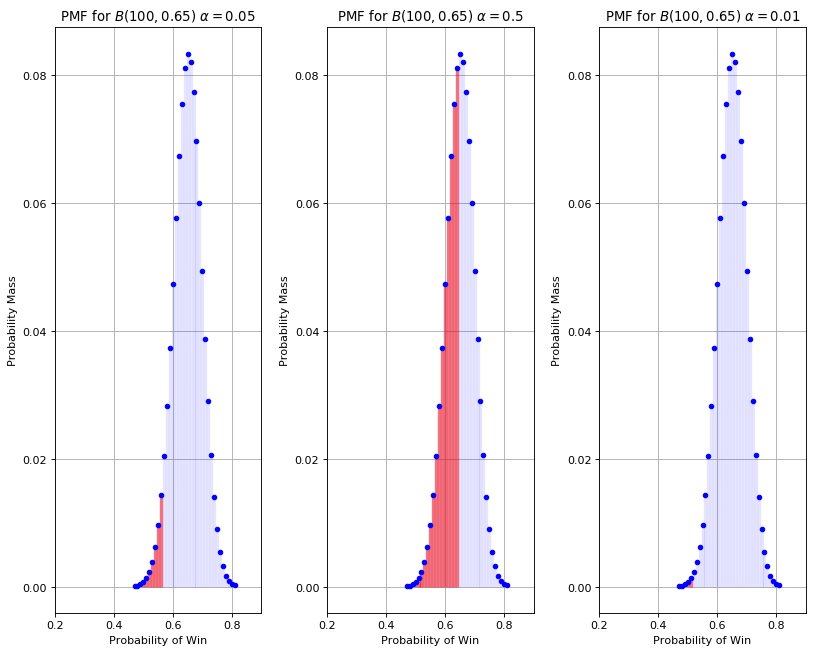

            for alpha=0.05	|			 alpha=0.5	|		 alpha=0.005
LCB           	   0.52  	|			  0.65  	|		   0.52
Showing how with the effect of varying alpha with a fixed p and n. Given that the starting LCB value is 0, this shows that the lower the value of alpha the slower the LCB estimate changes.


In [25]:
n1, p1 = 100, 0.65
n2, p2 = 1000, 0.65
alpha=0.05

lca1 = binom.ppf(alpha2, n1, p1)/n1 
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,3, 1)

plt.plot(x1/n1, y1, 'b.', ms=8)
x1_ax,x2_ax,y1_ax,y2_ax = plt.axis()
plt.axis((.2,.9,y1_ax,y2_ax))
plt.vlines(x1/n1, 0, y1, colors='b', lw=lw, alpha=0.1)
plt.vlines(lcbx1/n1, 0, lcby1, colors='r', lw=lw, alpha=0.5)
plt.xlabel("Probability of Win")
plt.ylabel("Probability Mass")
plt.title(r"PMF for $B(100,0.65)$ $\alpha=0.05$")

plt.grid(True)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

###################################
plt.subplot(1,3, 2)
alpha2=0.5
lca11 = binom.ppf(alpha2, n1, p1)/n1 

lcbx3 = np.arange(binom.ppf(0.001, n1, p1),binom.ppf(alpha2, n1, p1))
lcby3=binom.pmf(lcbx3, n1, p1)

plt.plot(x1/n1, y1, 'b.', ms=8)
x1_ax,x2_ax,y1_ax,y2_ax = plt.axis()
plt.axis((.2,.9,y1_ax,y2_ax))
plt.vlines(x1/n1, 0, y1, colors='b', lw=lw, alpha=0.1) #this alpha is transparancy
plt.vlines(lcbx3/n1, 0, lcby3, colors='r', lw=lw, alpha=0.5)
plt.xlabel("Probability of Win")
plt.ylabel("Probability Mass")
plt.title(r"PMF for $B(100,0.65)$ $\alpha=0.5$")
plt.grid(True)
plt.tight_layout(pad=0.1, w_pad=0.9, h_pad=1.0)

#######################################
plt.subplot(1,3, 3)
alpha2=0.005
lca12 = binom.ppf(alpha2, n1, p1)/n1 

lcbx3 = np.arange(binom.ppf(0.001, n1, p1),binom.ppf(alpha2, n1, p1))
lcby3=binom.pmf(lcbx3, n1, p1)

plt.plot(x1/n1, y1, 'b.', ms=8)
x1_ax,x2_ax,y1_ax,y2_ax = plt.axis()
plt.axis((.2,.9,y1_ax,y2_ax))
plt.vlines(x1/n1, 0, y1, colors='b', lw=lw, alpha=0.1) #this alpha is transparancy
plt.vlines(lcbx3/n1, 0, lcby3, colors='r', lw=lw, alpha=0.5)
plt.xlabel("Probability of Win")
plt.ylabel("Probability Mass")
plt.title(r"PMF for $B(100,0.65)$ $\alpha=0.01$")
plt.grid(True)
plt.show()
print(f"            for alpha=0.05\t|\t\t\t alpha=0.5\t|\t\t alpha=0.005")
print(f"LCB           \t   {lca1}  \t|\t\t\t  {lca11}  \t|\t\t   {lca12}")
print(f"Showing how with the effect of varying alpha with a fixed p and n. Given that the starting LCB value is 0, this shows that the lower the value of alpha the slower the LCB estimate changes.")


## If you dont have the SCIPY Package

There are a number of methods which you can use to give you the LCB and UCB for a Bernoulli trial. Some of you may have been exposed to the [Wald](https://corplingstats.wordpress.com/2012/11/14/wald-is-wrong/) method for hypothesis testing, however this was shown to be unsuitable due to inconsistencies in its prediction. If you don't have access to  _scipy_ or some equivalent library we can still obtain the confidence level by using one of the many methods to determine a [binomial proportion confidence interval](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval), I will show you how to use the Wilson score with continuity correction. One of the issues with the normal approximation methods is that for a proportion the values have to lie within the range $[0,1]$ so when the values are close to the extremities a normal approximation for the distribution cannot be achieved. The Wilson-score with continuity correction accounts for this. 

Here is the formula from Wikipedia 
![wilson with CC](https://wikimedia.org/api/rest_v1/media/math/render/svg/5dd0452ea2018ec009a6294014a8d7068ef7e39b)
where: $n=$number of games, $\hat{p}=\frac{w}{n}=$sample probability and $z=$z-score. The z-score is related to our desired confidence level. The z-score is based on the number of standard deviations to obtain our required probability mass, we can simply lookup this value from a [table](http://www.math.armstrong.edu/statsonline/5/5.3.2.html). Common z-score values for a single sided confidence levels are $z_{.95}=1.645$, $z_{0.99}=2.33$

We define our Wilson function as taking the number of wins, the number of games and the z-score for our confidence level and we return the one-sided LCB,UCB and mean.   
<a id="wils_int"></a>

In [26]:
import math
def wils_int(w,n,alpha=0.05,cc=True): ##cc==True means with continuity correction.
        alpha_dict={} #http://www.math.armstrong.edu/statsonline/5/5.3.2.html
        alpha_dict[0.2]=1.28
        alpha_dict[0.1]=1.645
        alpha_dict[0.05]=1.96
        alpha_dict[0.02]=2.33
        assert alpha in alpha_dict.keys()
        z=alpha_dict[alpha]
        
        if n==0:
            return 0,1,0.5
        p_hat = float(w) / n
        q=1-p_hat

        if cc:
            try:
                if p_hat == 0:
                    p1L=0
                else:
                    p1L = max(0,(2 * n * p_hat + z * z - (z * math.sqrt(z * z - 1 / n + 4 * n * p_hat * (1 - p_hat) + (4 * p_hat - 2)) + 1)) / (2 * (n + z * z)))
                if p_hat==1:
                    p1U=1
                else:
                    p1U = min(1,(2 * n * p_hat + z * z + (z * math.sqrt(z * z - 1 / n + 4 * n * p_hat * (1 - p_hat) - (4 * p_hat - 2)) + 1)) / (2 * (n + z * z)))

            except ValueError:
                print(f"X:{X},n:{n},p_hat:{p_hat},z:{z}")
                raise
        else:
            p1L = ((p_hat + z * z / (2 * n) - z * math.sqrt((p_hat * (1 - p_hat) + z * z / (4 * n)) / n)) / (1 + z * z / n))
            p1U = ((p_hat + z * z / (2 * n) + z * math.sqrt((p_hat * (1 - p_hat) + z * z / (4 * n)) / n)) / (1 + z * z / n))
        E=n*p_hat
        mean=(p1U+p1L)/2.0
        return p1L,p1U,mean
w1=p1*n1
L1w,U1w,mean1w=wils_int(w=w1,n=n1,alpha=0.05)
print(f"B({n1},{p1})  _____  LCB:{L1w}, UCB:{U1w}, mean:{mean1w}")
w2=p2*n2
L2w,U2w,mean2w=wils_int(w=w2,n=n2,alpha=0.05)

print(f"B({n2},{p1}) _____  LCB:{L2w}, UCB:{U2w}, mean:{mean2w}")


B(100,0.65)  _____  LCB:0.5474421458241865, UCB:0.740877936207696, mean:0.6441600410159413
B(1000,0.65) _____  LCB:0.6194063639763915, UCB:0.6794261898761669, mean:0.6494162769262792


We can see that the Wilson score gives slightly different values from when using the exact method and one of the criticisms of exact methods is that they are often [too conservative](https://www.stat.berkeley.edu/~stark/SticiGui/Text/confidenceIntervals.htm). These results allow us to state that we have $95\%$ confidence that the true $p>0.56$ or we have $95\%$ confidence true $p<0.62$ or we are $90\%$ confident that $p$ is in the range $0.56<p<0.67$.

At this point we'll create a similar function for the exact method using SCIPY, so we can test it later. 
<a id="exact_int"></a>

In [27]:
def exact_int(w,n,alpha=0.05): ##cc==True means with continuity correction.
    #note that for low n and p_hat=1.0 all the mass will be in 1.0 which will make obtaining confidence intervals incorrect. 
    #to make it work for that extreme case then ensure at least n=7 are played. I obtained this by setting p_hat=0.95 and determining
    #many n were needed to cause l>.5 or u<.5
    p_hat=w/n
    if w==n and n<7: 
        l=0
        u=1
        mean=0.5
        return l,u,mean

    alpha=alpha/2
    lc = binom.ppf(alpha, n, p_hat)/n
    uc = binom.ppf(1-alpha, n, p_hat)/n
    mean=(uc+lc)/2
    return lc,uc,mean

w1=p1*n1
L1e,U1e,mean1e=exact_int(w=w1,n=n1,alpha=0.05)
print(f"B({n1},{p1})  _____  LCB:{L1e}, UCB:{U1e}, mean:{mean1e}")
w2=p2*n2
L2e,U2e,mean2e=exact_int(w=w2,n=n2,alpha=0.05)
print(f"B({n2},{p1}) _____  LCB:{L2e}, UCB:{U2e}, mean:{mean2e}")


B(100,0.65)  _____  LCB:0.56, UCB:0.74, mean:0.65
B(1000,0.65) _____  LCB:0.62, UCB:0.679, mean:0.6495


## How many N?
Recall that we are attempting to disprove the hypothesis that two players have an equal probability of winning.

$H_0:p=0.5$ and 
$H_a:p\neq 0.5$

We will conduct this test by playing $n$ games and observing the number of wins $w$ we can then get the one-sided LCB, $L$ and the one-sided UCB $U$ for our required confidence level (using one of the two methods above). If the $L>0.5$ or $U<0.5$ we can dismiss our null hypothesis and state with confidence that the two players are not equal. We can then determine which of the players is the best player by comparing their number of wins; however we technically we can't say that we have the same confidence with this additional claim about who is the better player but in a practical sense the difference is insignificant.

The minimum number of games that have to be played is dependent on the true $p$ and the error specification for our problem. The problem is that we do not know what $p$ really is for either one of the players, so how could we possibly determine $n$? First lets talk about error then we'll run an experiment to assist us.   

### Types of Error
If we reject our null-hypothesis $H_0$ when in actual fact it was true this is a **Type I Error** the probability of making a Type I error is the significance level $\alpha$. So if after $n$ games, $L>0.5$ we reject $H_0$ but the true value of $p=0.5$ we have a Type I error. Not to labour on an obvious point, but it's an important realisation that **Type I Errors can only occur if true $p=0.5$**. 

If the true $p\ne0.5$ and we fail to reject $H_0$ then we have committed a **Type II Error**, the probability of making a Type II error is $\beta$. So if after $n$ games $L<0.5$ and $U>0.5$ but the true value of $p\ne0.5$ we have a Type II error. Again **Type II errors only occur if true $p\ne0.5$**

|  | $H_0$ True | $H_0$ False |
| --- | --- | --- |
| Reject $H_0$ | Type I Error | Correct |
| Fail to Reject $H_0$ | Correct | Type II Error |

#### TYPE I Errors
When $p=0.5$ we risk Type I errors. We saw in our previous plots that if we conduct more games the distribution becomes narrower, which in turn brings the LCB and UCB closer to $p$. We can completely avoid Type I errors by simply not playing enough games, that is to say we will never make a Type I error if we never make a prediction, however this would be fairly useless. It seems that if we play too many games then we will increase the chance of committing Type I errors, however the methods covered above account for this situation keeping the Type I error to the required value. The probability of making a type I error is $\alpha$, the basis for our $1-\alpha$ confidence level. Type I errors are often the primary concern of scientists because we are dismissing $H_0$ with some confidence. If we fail to dismiss the hypothesis we are only claiming that our testing was unable to dismiss $H_0$, a much less definitive claim. The effect of a very low $\alpha$ is that the confidence bounds move at a slower rate with each game played.            

#### TYPE II Errors
When $p\ne0.5$ we risk type II errors $\beta$. If we do not play enough games $L$ and $U$ will never move sufficiently to cross $0.5$ and would never indicate $H_0$ is false resulting in $\beta=1$. We need to ensure that we play enough games to allow the confidence bounds to cross the $0.5$ value. The more games we play, the higher the fidelity we gain in making our predictions. Some medical [literature](https://web.ma.utexas.edu/users/mks/statmistakes/errortypes.html) warn against having too high a sample size because it can detect small variations, which might show a statistically significant result but be practically unusable. Likewise if the significance level of the test  $\alpha$ is very small. [Power](https://www.statisticsteacher.org/2017/09/15/what-is-power/) is the probability of making a correct decision when $H_0$ is false i.e. $H_a$ is true. Power is the probability of not committing Type II errors i.e. $P=1-\beta$. [Power is dependent on](https://www.abtasty.com/blog/type-1-and-type-2-errors/) the sample size $n$, the significance $\alpha$ and the true value $p$.              


## Testing our experiment

This code creates a mock game, which will randomly choose a winner based on $p$. We can set this value for the sake of testing, however our methodology does not know the true $p$.  
<a id="play_one_game"></a>

In [28]:

import numpy as np

def play_one_game(p,q):  #chooses a random winner based on the probabilty distribution.
    winner = np.random.choice([1, 2], p=[p, q])
    return winner

winnercount=[0,0] #idx 0 is p1wins idx 1 is p2wins
for i in range(1000):
    w=play_one_game(0.9,0.1)
    winnercount[w-1]+=1

print(f"winnercounts {winnercount}")

winnercounts [908, 92]


Let's play $100,000$ games and conduct a hypothesis test using the Wilson Score with $\alpha=0.05$ and $p=0.9$. Recall that z=1.64 for $95\%$ confidence. We know that $n=100,000$ and need to determine $w$.
<a id="one_competition"></a>
<a id="test_h0"></a>

In [35]:
def one_competition(p,n):
    q=1-p
    winnercount=[0,0] #idx 0 is p1wins idx 1 is p2wins
    for i in range(n):
        w=play_one_game(p,q)
        winnercount[w-1]+=1
    return winnercount

def test_h0(l,u,verbose=False): #given a lower and an uppder confidence test if our null hypothesis is valid 
    if verbose:
        print(f"L={l},U={u}")
    if l>0.5:
        if verbose:
            print(f"L > 0.5. I am confident that the players are not equal. Reject H_0:p=0.5")
        rejectH0=True
    elif u<0.5:
        if verbose:
            print(f"U < 0.5. I am confident that the players are not equal. Reject H_0:p=0.5")
        rejectH0=True
    else:
        if verbose:
            print(r"Cannot reject H_0:p=0.5")
        rejectH0=False

    return rejectH0
##############play with these values to see how n changes the predictability. 

n=1000
p=0.51
alpha=0.05
winners=one_competition(p,n)
w=winners[0]
print("Using Wilson ------------------------")
l,u,m=wils_int(w,n,alpha)
rejectH0=test_h0(l,u,verbose=True)

print("Using Exact ------------------------")
l,u,m=exact_int(w,n,alpha)
rejectH0=test_h0(l,u,verbose=True)
        

Using Wilson ------------------------
L=0.47953564666800924,U=0.5423788054812283
Cannot reject H_0:p=0.5
Using Exact ------------------------
L=0.48,U=0.542
Cannot reject H_0:p=0.5


Now that we have function to run one competition, we now need to measure Type I and Type II errors across a number of different competitions.
<a id="check_error"></a>
<a id="test_for_typeI_errors"></a>


In [36]:
def check_error(p,rejectedH0):
    errors=[0,0] #the 0th idx is type 1 error the 1th idx is type 2 error
    if p==0.5: #then this could be a type I error
        if rejectedH0: #we rejected the hypothesis erroniously
            errors[0]=1
    elif p!=0.5: #then it could be a type II error
        if not rejectedH0: #we failed to reject H0
            errors[1]=1
    return errors

def test_for_typeI_errors(n,number_of_competitions,method,alpha=0.05,verbose=True):
    ###########################First will check for type I errors.

    if verbose: 
        print(f"Testing for type I errors with alpha={alpha}  {method.__name__} ")
        print(f"running...{number_of_competitions} competitions consisting of {n} games each")

    p=0.5
    errors=np.array([0,0])

    for i in range(number_of_competitions):
        winners=one_competition(p,n)
        w=winners[0]
        l,u,m=method(w,n,alpha)
        rejectH0=test_h0(l,u,verbose=False)
        errors+=check_error(p,rejectH0)


    if verbose: 
        print(f"nerrors [I,II]{errors}")
        ePerc=errors/number_of_competitions
        print(f"error ratios [I,II][{round(ePerc[0],2)},{round(ePerc[1],2)}]")
    return errors
n=500
number_of_competitions=1000
alpha=0.05
test_for_typeI_errors(n,number_of_competitions,method=exact_int,alpha=alpha,verbose=True)
test_for_typeI_errors(n,number_of_competitions,method=wils_int,alpha=alpha,verbose=True)


Testing for type I errors with alpha=0.05  exact_int 
running...1000 competitions consisting of 500 games each
nerrors [I,II][42  0]
error ratios [I,II][0.04,0.0]
Testing for type I errors with alpha=0.05  wils_int 
running...1000 competitions consisting of 500 games each
nerrors [I,II][48  0]
error ratios [I,II][0.05,0.0]


array([48,  0])

Now we'll test for type II errors. We have an additional challenge with type II errors in that the error is dependent on $p$, I have fixed $p$ in this example but we'll plot the error after. The next section of code shows how we will measure our type II errors.  
<a id="test_for_typeII_errors"></a>


In [37]:
def test_for_typeII_errors(p,n,number_of_competitions,method,alpha=0.05,verbose=True):
    ###########################First will check for type I errors.

    if verbose: 
        print(f"Testing for type II errors with  p={p} alpha={alpha}  {method} ")
        print(f"running...{number_of_competitions} competitions consisting of {n} games each")

    errors=np.array([0,0])

    for i in range(number_of_competitions):
        winners=one_competition(p,n)
        w=winners[0]
        l,u,m=method(w,n,alpha)
        rejectH0=test_h0(l,u,verbose=False)
        #if verbose: print(f"l:{l},u:{u} {['NOT',''][rejectH0]} Rejected")
        errors+=check_error(p,rejectH0)


    if verbose: 
        print(errors)
        ePerc=errors/number_of_competitions
        print(f"errors {round(ePerc[0],2)},{round(ePerc[1],2)}")
    return errors
n=500
number_of_competitions=1000
alpha=0.05
p=0.58
test_for_typeII_errors(p,n,number_of_competitions,method=exact_int,alpha=alpha,verbose=True)
test_for_typeII_errors(p,n,number_of_competitions,method=wils_int,alpha=alpha,verbose=True)


Testing for type II errors with  p=0.58 alpha=0.05  <function exact_int at 0x000001612C64A840> 
running...1000 competitions consisting of 500 games each
[ 0 55]
errors 0.0,0.06
Testing for type II errors with  p=0.58 alpha=0.05  <function wils_int at 0x000001612C64A9D8> 
running...1000 competitions consisting of 500 games each
[ 0 68]
errors 0.0,0.07


array([ 0, 68])

As promised we now will see how Type II errors are dependent on $p$. We have fixed $n$, fixed $\alpha$ and fixed $number_of_competitions$ and vary $p$ and plot the resulting Type II error. We can see that Type II errors increase as $p$ approached $0.5$.  This is relationship is true for all $n$, however the magnitude of the error decreases as $n$ increases.


<IPython.core.display.Javascript object>


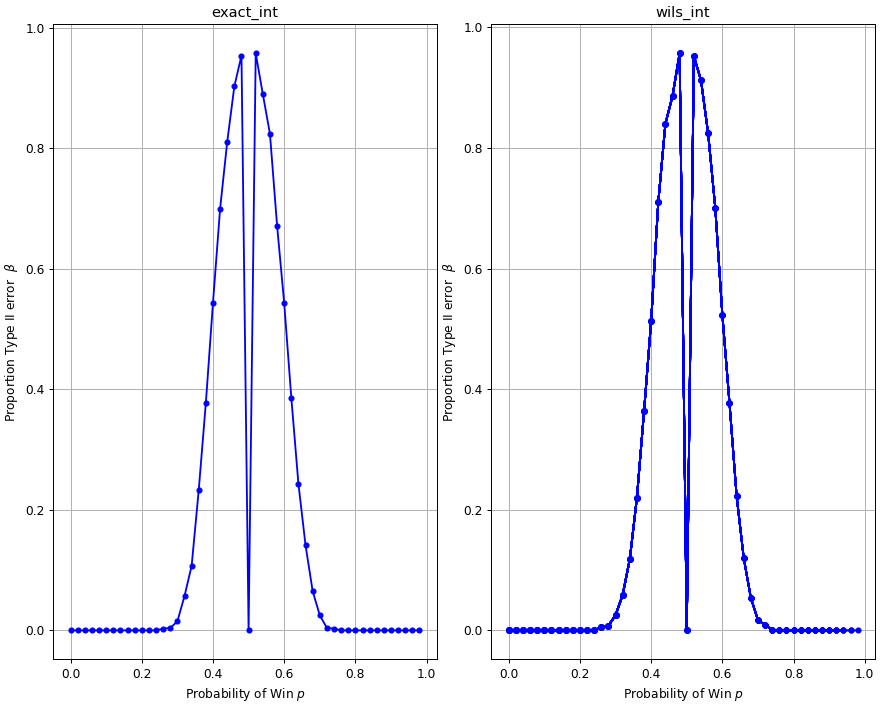

If your dataset has p=0.5 you will notice that TypeII error is 0 at p=0.5, since only Type I errors can be made when p=0.5


In [383]:
%matplotlib notebook
n=100
alpha=0.05
number_of_competitions=1000
ps=np.arange(0,0.99,.02)
xs=[]
ys=[]
xs2=[]
ys2=[]
method=exact_int
method2=wils_int

#print(f"------ {exact_int.__name__} ------")
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
ax=fig.add_subplot(121)
ax2=fig.add_subplot(122)

plt.ion()
fig.show()
fig.canvas.draw()

for p in ps:
    #print(f"{round(p,2)},",end='')
    error=test_for_typeII_errors(p,n,number_of_competitions,method=method,alpha=alpha,verbose=False)
    ys.append(error[1]/number_of_competitions)
    xs.append(p)
    
    error2=test_for_typeII_errors(p,n,number_of_competitions,method=method2,alpha=alpha,verbose=False)
    ys2.append(error2[1]/number_of_competitions)
    xs2.append(p) 
    ax.clear()
    

    ax.plot(xs, ys, 'b.-', ms=8)
    ax2.plot(xs2, ys2, 'b.-', ms=8)

    #x1_ax,x2_ax,y1_ax,y2_ax = plt.axis()
    #plt.axis((.2,.9,y1_ax,y2_ax))
    ax2.set_xlabel(r"Probability of Win $p$")
    ax2.set_ylabel(r"Proportion Type II error  $\beta$")
    ax2.set_title(f"{method2.__name__}")
    ax2.grid(True)

    ax.set_xlabel(r"Probability of Win $p$")
    ax.set_ylabel(r"Proportion Type II error  $\beta$")
    ax.set_title(f"{method.__name__}")
    ax.grid(True)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    fig.canvas.draw()
print(f"If your dataset has p=0.5 you will notice that TypeII error is 0 at p=0.5, since only Type I errors can be made when p=0.5")


This observation leads us to the requirement that if we wish to hold Type II errors to below some maximum value then we will need to decide on how close to $0.5$ we will consider as an important difference between the two players. For example if $p=0.49$ do we care enough about detecting a $0.02$ probability difference between both players, taking into account the additional games that would be required to reduce the error to an acceptable level? Let's say for example that we only care about a difference greater than $\delta=0.1$ i.e. $0.45>p>0.55$. At $p=0.55$ how does the type II error change as $n$ increases? 

<IPython.core.display.Javascript object>


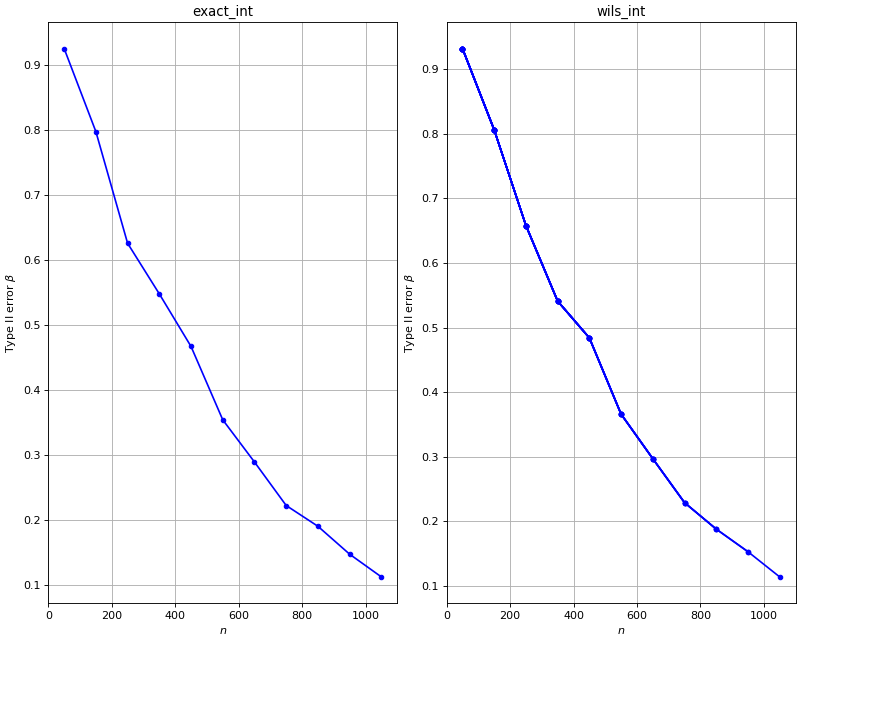

KeyboardInterrupt: 

In [388]:
%matplotlib notebook
alpha=0.05
number_of_competitions=1000
p=0.55
xs=[]
ys=[]
xs2=[]
ys2=[]
method=exact_int
method2=wils_int

fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
ax=fig.add_subplot(121)
ax2=fig.add_subplot(122)

plt.ion()
fig.show()
fig.canvas.draw()
ns=range(50,3000,100)
p=0.55

for n in ns:
    error=test_for_typeII_errors(p,n,number_of_competitions,method=method,alpha=alpha,verbose=False)
    ys.append(error[1]/number_of_competitions)
    xs.append(n)
    
    error2=test_for_typeII_errors(p,n,number_of_competitions,method=method2,alpha=alpha,verbose=False)
    ys2.append(error2[1]/number_of_competitions)
    xs2.append(n) 
    ax.clear()
    

    ax.plot(xs, ys, 'b.-', ms=8)
    ax2.plot(xs2, ys2, 'b.-', ms=8)

    #x1_ax,x2_ax,y1_ax,y2_ax = plt.axis()
    #plt.axis((.2,.9,y1_ax,y2_ax))
    ax2.set_xlabel(r"$n$")
    ax2.set_ylabel(r"Type II error $\beta$")
    ax2.set_title(f"{method2.__name__}")
    ax2.grid(True)

    ax.set_xlabel(r"$n$")
    ax.set_ylabel(r"Type II error $\beta$")
    ax.set_title(f"{method.__name__}")
    ax.grid(True)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    fig.canvas.draw()


These plots show how Type II error changes with different $n$ for $p=0.55$ and $\alpha=0.05$. We can see from these plots that to achieve a Type II error below $0.1$ at least $1000$ games will need to be played. Let's create some code which can provide us the minimum $n$ required for a chosen $p$ and $\alpha$. 
<a id="how_many_n_for_typeII"></a>

In [38]:
def how_many_n_for_typeII(p,alpha=0.05,beta=0.05,number_of_competitions=10000,maximumn=2000,method=wils_int,verbose=True):
    #we will find out how many n are required by incrementing n until we reach the the desired value for Beta. 
    #if we don't have enough number_of_competitions then our prediction will be subject to more variance
    #if you set too high a maximumn it will take too long.
    ns=range(2,maximumn)
    found=False #need two in a row to be true
    foundN=-1
    for n in ns:
        #print(n)
        t1,t2=test_for_typeII_errors(p,n,number_of_competitions,method=method,alpha=alpha,verbose=False)
        t2=t2/number_of_competitions
        print((n,t2))
        if t2<beta:
            #we have found our n
            
            if found:
                if verbose: print(f"To achieve beta<{beta} for p={p} & alpha={alpha} you need at least {foundN} games per competition.")
                return foundN
            else:
                foundN=n
                found=True
        else:
            if found: print(f"Found n={foundN}<beta but didn't occur twice in a row. ")
            found=False
            foundN=-1
            
    if verbose: print(f"Couldn't achieve beta<{beta} with up to {maximumn} games. ")

#This does the same job just a slightly different way
def howmanyNforMaxType2(p=0.7,maxType2=0.05,method=wils_int,alpha=0.05,maxgamesToPlay=4000,number_of_competitions=1000000,startat=1):
    #Returns how many n to achieve a maximum type 2 error rate of maxType2.
    t = ["P","N","T1","T2"]
    print(t)
    for n in range(startat,maxgamesToPlay):
        #check if n and wins would be whole numbers to get this p. p=x/n
        #for example if I am checking for 90% is 10 games enough?

        t1,t2=test_for_typeII_errors(p,n,number_of_competitions,method=method,alpha=alpha,verbose=False)
        t2=t2/number_of_competitions
        newrow=[f"{p}",f"{n}", f"{round(t1,4)}", f"{round(t2,4)}"]
        t.append(newrow)
        print(newrow)
        if t2>maxType2:
            continue
        else:
            print(f"{n}")
            return n
    return None

p=.99
alpha=0.05
beta=0.05
#howmanyNforMaxType2(p=p,maxType2=beta,method=wils_int,alpha=alpha,maxgamesToPlay=2000,number_of_competitions=10000,startat=1)
print(f"Exact Method p={p}")

n=how_many_n_for_typeII(p,alpha,beta,method=exact_int,verbose=True)
print(n)
print(f"Wilson Method p={p}")

n=how_many_n_for_typeII(p,alpha,beta,method=wils_int,verbose=True)
print(n)



Exact Method p=0.99
(2, 0.9999)
(3, 1.0)
(4, 1.0)
(5, 1.0)
(6, 1.0)
(7, 0.0018)
(8, 0.0029)
To achieve beta<0.05 for p=0.99 & alpha=0.05 you need at least 7 games per competition.
7
Wilson Method p=0.99
(2, 1.0)
(3, 1.0)
(4, 1.0)
(5, 1.0)
(6, 0.06)
(7, 0.0655)
(8, 0.0798)
(9, 0.0047)
(10, 0.0037)
To achieve beta<0.05 for p=0.99 & alpha=0.05 you need at least 9 games per competition.
9


When setting up our problem we need to decide what our acceptable threshold for difference between the two players is, we call this parameter $\delta$. Then we can determine from the code above what the minimum number of games is needed per competition to differentiate between two players which have a difference of $|p-q|>\delta$. If we want to be very fine grained then we need a larger number of games. If we are able to accept a lower threshold then less games are required. The [TypeII_Power_Plot](#TypeII_Power_Plot) is a plot based on the [how_many_n_for_typeII function](#how_many_n_for_typeII) for a selection of $p$ providing an easy means to read the minimum $n$ for a minimum $p$. This plot was created using Wilson, however the values it provides would suffice when using the exact method. For example if for $\delta=.1$ we obtain $n$ by reading of the plot where $p=0.55$ and we would need to do a minimum of $1000$ games to achieve $\beta=0.1$ 


<a id="TypeII_Power_Plot"></a>
![title](img/nGamesForType2Error.png)

## Proving it works
So now let's put this method to the test. We have two players and they have hidden true probabilities of $p$ and $q$. We would like to find out if one player is better than the other. 

Our requirements are as follows:
<ol>
    <li> If we do claim that one is better than the other we want to be $95\%$ confident in that statement, i.e. no more than 5% of positive predictions being incorrect or $\alpha=0.05$. (Type I Error)
    <li> We want our experiment to have the power to correctly detect differences between the player's true probabilities of $|p-q|=\delta \geq 0.1$ $95/%$ of the time or $\beta=0.05$ . i.e. if $p \geq 0.55$ or $q \geq 0.55$ we want to ensure that at least $95\%$ of the time we are making predictions. (Type II Error)
</ol>

To compare our players we will play them against each other for $n$ games, record the total number of wins $w$ for one of the players then we can calculate $\hat{p}=\frac{w}{n}$. We will then use either our *wils_int* or *exact_int* function to obtain the lower $L$ and upper $U$ confidence bounds for $p$. If $L>0.5$ or $U<0.5$ we can claim with confidence that one player is better than the other. From the previous plot we can see that we need $n\approx1300$ to have the power to predict a difference between the players of $\delta=0.1$. Our parameters are:
<OL>
        <li> $\alpha=0.05$
        <li> $\beta=0.05$
        <li> $\delta=0.1$
        <li> $n=1300$
</OL>

Now we will test the system to see if we can meet the required specifications by using these parameters.
### Test game
 Our test game function, *[play_one_game](#play_one_game)* returns a winner based on the provided $p$ value. We know that the more similar the players, the more difficult it is to make a prediction. So to stress test the system at the limits of our requirements we will set the actual probability of a player winning our test game function to $p=0.55$. We confirm the test game is performing as expected below. 
#### Type II Errors

In [13]:
p=0.55 #True prob of winning our testgame. Our prediction system doesn't know this

winnercount=[0,0] #idx 0 is p1wins idx 1 is p2wins
for i in range(1300):
    w=play_one_game(0.55,0.45)
    winnercount[w-1]+=1

print(f"winnercounts:{winnercount}, phat={winnercount[0]/n}")


winnercounts:[748, 552], phat=0.5753846153846154


##### One Competition
Our competition function [one_competition](#one_competition), is the above code in function form, it plays $n$ trial games between the players and returns the number of wins for the player $w$. It has input parameters of $p$ and $n$

In [45]:
p=0.55 #True prob of winning our testgame. Our prediction system doesn't know this
n=1300
w=one_competition(p,n)
print(f"winnercounts:{w}, phat={w[0]/n}")

winnercounts:[736, 564], phat=0.5661538461538461


With the results from our competition we then use one of the methods [wils_int](#wils_int) or [exact_int](#exact_int) to obtain the confidence bounds $L$ and $U$. 

In [84]:
p=0.55 #True prob of winning our testgame. Our prediction system doesn't know this
n=1300

for i in range(0,5):
    w=one_competition(p,n)
    L,U,mean=wils_int(w[0],n)
    
    if L>0.5: 
        if p>0.5: correct="correct"
        else: correct="incorrect"
        print(f"p!=q. p is better. p is at least {L} - " +correct)
    elif U<0.5:
        if p<0.5: correct="correct"
        else: correct="incorrect"
        print(f"p!=q. q is better. p is at most {U} - "+correct)
    else:
        if p==0.5: correct="correct"
        else: correct="incorrect"
        print(f"Couldn't differentiate between p and q (L,U)=({round(L,2)},{round(U,2)}) - "+correct)    

p!=q. p is better. p is at least 0.5209204155582488 - correct
p!=q. p is better. p is at least 0.5348087131628384 - correct
p!=q. p is better. p is at least 0.5193785735904356 - correct
p!=q. p is better. p is at least 0.5109030764617624 - correct
Couldn't differentiate between p and q (L,U)=(0.5,0.55)- incorrect


##### Many Competitions
Since we are testing our predictions we know the true value of $p$ and can compare our prediction to the real case. We can check the accuracy of our prediction across a large number of competitions and obtain the prediction percentage. The functions [test_for_typeII_errors](#test_for_typeII_errors) and [test_for_typeI_errors](#test_for_typeI_errors) does this. It plays a number of competitions and returns the errors. Note that if $p!=0.5$ we can only commit type II errors. 


In [62]:
p=0.55 #True prob of winning our testgame. Our prediction system doesn't know this
alpha=0.05
delta=0.1
n=1300

number_of_competitions=1000
print("Exact Method------------------------")

t1,t2=test_for_typeII_errors(p,n,number_of_competitions,method=exact_int,alpha=alpha,verbose=True)
print(f"Achieved beta={t2/number_of_competitions} when p={p}")

print("Wilson Method-----------------------")
t1,t2=test_for_typeII_errors(p,n,number_of_competitions,method=wils_int,alpha=alpha,verbose=True)
print(f"Achieved beta={t2/number_of_competitions} when p={p}")


Exact Method------------------------
Testing for type II errors with  p=0.55 alpha=0.05  <function exact_int at 0x000001612C64A840> 
running...1000 competitions consisting of 1300 games each
[ 0 54]
errors 0.0,0.05
Achieved beta=0.054 when p=0.55
Wilson Method-----------------------
Testing for type II errors with  p=0.55 alpha=0.05  <function wils_int at 0x000001612C64A9D8> 
running...1000 competitions consisting of 1300 games each
[ 0 47]
errors 0.0,0.05
Achieved beta=0.047 when p=0.55


#### Type I Errors

##### One Competition

In [79]:
p=0.5 #True prob of winning our testgame. Our prediction system doesn't know this
n=1300
for i in range(0,5):
    w=one_competition(p,n)
    L,U,mean=wils_int(w[0],n)

    if L>0.5: 
        if p>0.5: correct="correct"
        else: correct="incorrect"
        print(f"p!=q. p is better. p is at least {L} - " +correct)
    elif U<0.5:
        if p<0.5: correct="correct"
        else: correct="incorrect"
        print(f"p!=q. q is better. p is at most {U} - "+correct)
    else:
        if p==0.5: correct="correct"
        else: correct="incorrect"
        print(f"Couldn't differentiate between p and q (L,U)=({round(L,2)},{round(U,2)})- "+correct)

Couldn't differentiate between p and q (L,U)=(0.48,0.53)- correct
Couldn't differentiate between p and q (L,U)=(0.46,0.51)- correct
Couldn't differentiate between p and q (L,U)=(0.46,0.52)- correct
Couldn't differentiate between p and q (L,U)=(0.48,0.53)- correct
p!=q. q is better. p is at most 0.49294683596531746 - incorrect


##### Many Competitions
Since we are testing our predictions we know the true value of $p$ and can compare our prediction to the real case. We can check the accuracy of our prediction across a large number of competitions and obtain the prediction percentage. The functions [test_for_typeI_errors](#test_for_typeI_errors) does this. It plays a number of competitions and returns the errors. Note that if $p==0.5$ we can only commit type I errors.

In [59]:
p=0.5 #True prob of winning our testgame. Our prediction system doesn't know this
alpha=0.05
delta=0.1
n=1300

number_of_competitions=1000
print("Exact Method------------------------")

t1,t2=test_for_typeI_errors(n,number_of_competitions,method=exact_int,alpha=alpha,verbose=True)
print(f"Achieved alpha={t2/number_of_competitions} when p={p}")

print("Wilson Method-----------------------")
t1,t2=test_for_typeI_errors(n,number_of_competitions,method=wils_int,alpha=alpha,verbose=True)
print(f"Achieved alpha={t2/number_of_competitions} when p={p}")

Exact Method------------------------
Testing for type I errors with alpha=0.05  exact_int 
running...1000 competitions consisting of 1300 games each
nerrors [I,II][53  0]
error ratios [I,II][0.05,0.0]
Actual beta=0.0 when p=0.5
Wilson Method-----------------------
Testing for type I errors with alpha=0.05  wils_int 
running...1000 competitions consisting of 1300 games each
nerrors [I,II][60  0]
error ratios [I,II][0.06,0.0]
Actual beta=0.0 when p=0.5
